# BootCamp Data Science Aplicada Alura

   #### Felipe Chermont Pereira

## *Módulo 01*

### *Aula 01* - Aquisição e leitura e análise dos dados do [SUS](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi).  

Os dados monstram o gasto em produção hospitalar mensal por unidade federativa do SUS de janeiro de 2008 até agosto de 2020 em reais

#### Carregando a Base de dados

Primeiramente, é preciso saber importar e tratar dados reais. A base de dados que trataremos veio com imperfeições que atrapalham a trabalhar com os dados, resolvemos então tratar:

   - Passar o encoding como padrão "ISO-8859-1"
   - Ignorar as primeiras linhas (skiprows)
   - Ignorar as ultimas linhas (skipfooter)
   - Informar o separador como ";" (sep)
   - Informar o separador de milhares como "." (thousands)
   - Informar o separador de decimal como "," (decimal)


In [1]:
import pandas as pd
from matplotlib.lines import Line2D
import numpy as np

In [2]:
dados = pd.read_csv("../dados/A151346189_28_143_208.csv", encoding= "ISO-8859-1",
                   skiprows = 3, sep=";",skipfooter = 12, engine='python', thousands=".", decimal=",")

dados.head() #exibir as 5 primeiras linhas

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3097113.21,3059823.80,2912519.98,2937346.43,2868820.96,2752228.26,3401864.29,3015488.30,2826486.18,3.050109e+08
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,35925899.01,34345207.63,37384336.94,35512568.15,28217249.66,32617541.05,41625331.28,38438873.79,39911193.02,4.437116e+09


Importação e "limpeza" dos dados realizada

In [3]:
dados.tail() #exibir as 5 ultimas linhas

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,30931325.46,57363420.01,51547794.07,56673338.49,48397733.07,52413429.62,56636376.98,56113054.70,55356224.30,...,90775418.13,94908336.74,91437940.91,1.028761e+08,83000318.02,82381774.95,86051002.13,1.005310e+08,101374341.51,1.195865e+10
23,50 Mato Grosso do Sul,5377392.11,7002472.61,8423933.19,8797487.68,9770421.80,10905392.18,10249299.82,9671553.45,10218511.05,...,17895244.76,18115134.64,19542439.88,1.903279e+07,17410262.53,17913161.92,17331445.92,1.875556e+07,19241624.02,2.172158e+09
24,51 Mato Grosso,4795299.01,8684882.23,7886243.14,8794109.79,9231645.40,10221763.77,9163314.28,9243148.81,9052354.89,...,15029205.51,15249241.20,15046851.63,1.488682e+07,12546999.04,13604225.34,13151005.63,1.637164e+07,17790649.87,2.036924e+09
25,52 Goiás,15310637.29,22258668.68,21442515.75,20921212.45,21615970.67,18270043.87,20540517.13,20650730.67,20868443.56,...,34873099.14,35775375.69,35005746.36,3.479399e+07,30896577.34,34305180.56,35701473.15,3.940505e+07,43984702.05,4.657350e+09
26,53 Distrito Federal,4745919.19,7632480.67,9647203.26,11098732.99,12891719.72,12850125.67,12565646.74,13710857.89,13165106.20,...,18769437.77,22341629.09,20643441.06,2.294716e+07,21536505.16,19058243.91,22704335.27,2.526977e+07,26526196.39,2.429933e+09


In [4]:
dados.info() #informações sobre a tabela

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Columns: 154 entries, Unidade da Federação to Total
dtypes: float64(151), object(3)
memory usage: 32.6+ KB


In [5]:
dados.mean() #valor da média de cada mês

2008/Jan    1.512685e+07
2008/Fev    2.271016e+07
2008/Mar    2.459419e+07
2008/Abr    2.543196e+07
2008/Mai    2.651125e+07
                ...     
2020/Abr    4.101366e+07
2020/Mai    4.419363e+07
2020/Jun    4.732999e+07
2020/Jul    5.449551e+07
Total       5.993732e+09
Length: 151, dtype: float64

Vemos que a importação dos dados está em notação científica, podemos tratar este dado para melhor visualização

In [6]:
pd.options.display.float_format = "{:.2f}".format #ajuste do formato para amostragem dos dados

In [7]:
dados.mean() #nova exibição da média com o formato ajustado

2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2020/Abr     41013660.39
2020/Mai     44193633.75
2020/Jun     47329994.46
2020/Jul     54495511.57
Total      5993731798.30
Length: 151, dtype: float64

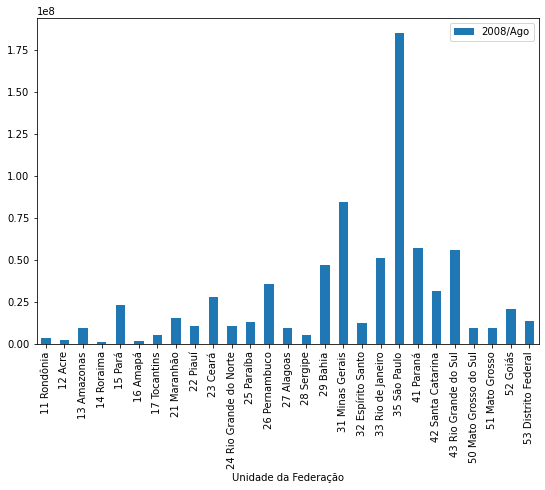

In [8]:
dados.plot(x = "Unidade da Federação", y = "2008/Ago", kind="bar", figsize=(9,6))

O gráfico trás uma representação dos gastos do SUS de agosto de 2008 de cada estado em fórma de gráfico em barra. O gráfico está "cru", não passando a informação que deveria da forma mais clara possível. Podemos utilizar bibliotecas do MatplotLib para deixa-lo mais claro

Text(0.5, 1.0, 'Valor por unidade da federação')

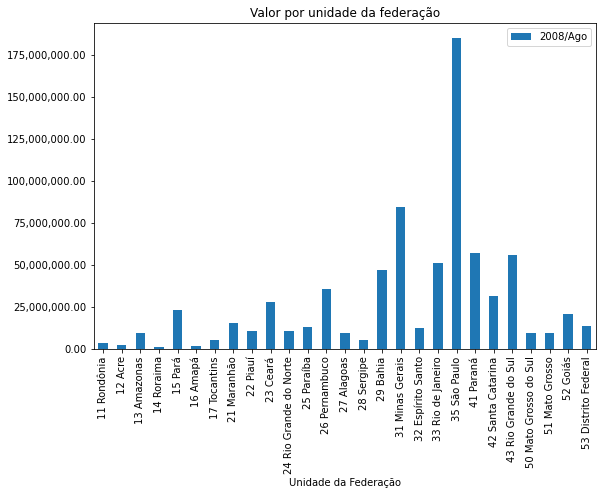

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ax = dados.plot(x = "Unidade da Federação", y = "2008/Ago", kind="bar", figsize=(9,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.title("Valor por unidade da federação") 

Melhoramos em relação ao gráfico anterior informando:
- Um Título;
- Utilizando Ticker para formatação dos valores exibidos

#### Desafios Aula 01:
1. Alterar o título para um que traga mais informações para o usuário
2. Realizar a mesma análise para o mês mais recente, trazendo quaisquer melhorias que achar interessante para o gráfico 

Para melhorar o gráfico, podemos retirar o UF dos estados, considerando que ja estamos exibindo o seu nome, a informação não trás beneficios e deixa o gráfico mais sujo.

In [10]:
dados["Unidade da Federação"] = dados["Unidade da Federação"].str.slice(3)
dados["Unidade da Federação"]

0                Rondônia
1                    Acre
2                Amazonas
3                 Roraima
4                    Pará
5                   Amapá
6               Tocantins
7                Maranhão
8                   Piauí
9                   Ceará
10    Rio Grande do Norte
11                Paraíba
12             Pernambuco
13                Alagoas
14                Sergipe
15                  Bahia
16           Minas Gerais
17         Espírito Santo
18         Rio de Janeiro
19              São Paulo
20                 Paraná
21         Santa Catarina
22      Rio Grande do Sul
23     Mato Grosso do Sul
24            Mato Grosso
25                  Goiás
26       Distrito Federal
Name: Unidade da Federação, dtype: object

In [11]:
gastosAgo2020 = dados["2020/Ago"]
gastosAgo2020

0      10285455.78
1                -
2      14726443.67
3       2826486.18
4      39911193.02
5       2942273.94
6       8240261.38
7      28587541.78
8      23210624.20
9      59808605.59
10     24929930.72
11     22130016.81
12     75704177.72
13     19754741.78
14     11014180.89
15     80793117.08
16    168024412.95
17     32188873.88
18     95274486.35
19    346512263.17
20    129375911.54
21     63972379.36
22    101374341.51
23     19241624.02
24     17790649.87
25     43984702.05
26     26526196.39
Name: 2020/Ago, dtype: object

Podemos ver que existe um valor vazio na linha de indice 1, que nos impede de plotar um gráfico significativo para esses valores, podemos tratar este dado vazio substituindo-o pela média ou mediana do estado do Acre, que pela tabela anterior percebemos que tem indice 1.

In [12]:
dados[dados["Unidade da Federação"] == 'Acre'].mean(axis = 1) #Media do Acre

1   5571762.11
dtype: float64

In [13]:
gastosAgo2020.replace("-", 5571762.11, inplace = True)
dados["2020/Ago"] = dados["2020/Ago"].astype('float64') #transformar os valores para float
gastosAgo2020.head()

0    10285455.78
1     5571762.11
2    14726443.67
3     2826486.18
4    39911193.02
Name: 2020/Ago, dtype: object

Agora podemos Realizar nossa projeção gráfica.

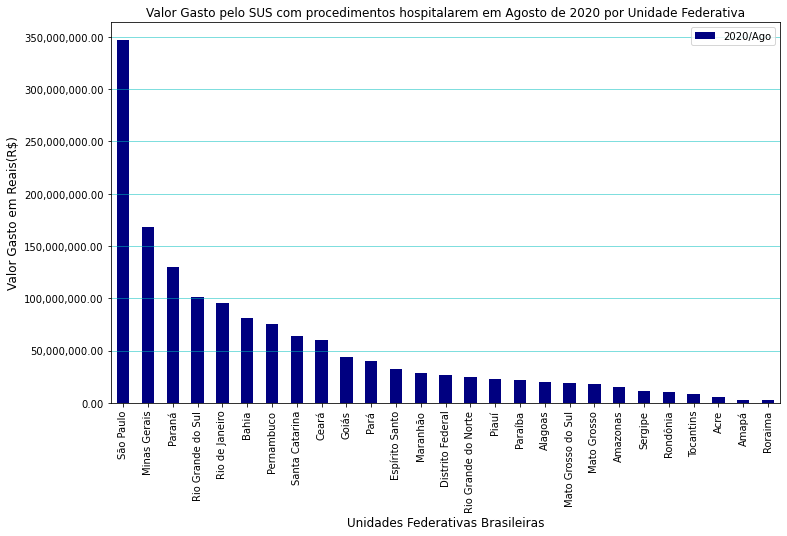

In [14]:
ax = dados.sort_values(by = '2020/Ago', ascending = False).plot(x = "Unidade da Federação", y = "2020/Ago",
                                            kind = "bar",color = "#000080" ,figsize = (12,7))
plt.grid(color='c', linestyle='-', linewidth=0.5, axis = 'y')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.xlabel("Unidades Federativas Brasileiras", fontdict={'fontsize': 12})
plt.ylabel("Valor Gasto em Reais(R$)", fontdict={'fontsize': 12})
plt.title("Valor Gasto pelo SUS com procedimentos hospitalarem em Agosto de 2020 por Unidade Federativa")
plt.show()

#### Lições aprendidas na Aula 01:
- Como utilizar o Tabnet para busca de dados da saúde Brasileira;
- Como utilizar o google Colaboratory;
- Como ler um arquivo CSV com Pandas;
- Como ler um arquivo CSV com caracteres especiais;
- Como ignorar o cabeçalho de um arquivo CSV;
- O que são DataFrames;
- Desafios de ler arquivos reais;
- Como formatar a impressão dos dados de um DataFrame

### *Aula 02* - Entendendo Gráficos

Começamos a importando novamente os dados que serão utilizados para a análise

In [15]:
dados = pd.read_csv("../dados/A160324189_28_143_208.csv", encoding= "ISO-8859-1",
                   skiprows = 3, sep=";",skipfooter = 12, engine='python', thousands=".", decimal=",")

dados.head() #exibir as 5 primeiras linhas

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,...,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,...,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


Podemos fatiar (slice) nosso dataframe para trazer apenas os dados se quer analisar, por exemplo:

In [16]:
dados[["2008/Ago", "2008/Set"]].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


Para analisar os meses que possuem valor, podemos armazenar o index da média de cada coluna para saber quais são as colunas que poderemos utilizar.

In [17]:
colunas_usaveis = dados.mean().index
colunas_usaveis

Index(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan',
       '2008/Fev', '2008/Mar', '2008/Abr', '2008/Mai',
       ...
       '2019/Nov', '2019/Dez', '2020/Jan', '2020/Fev', '2020/Mar', '2020/Abr',
       '2020/Mai', '2020/Jun', '2020/Jul', 'Total'],
      dtype='object', length=157)

In [18]:
dados[colunas_usaveis].head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
4,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


Percebe-se que a coluna com as Unidades Federativas foi eliminada pela forma que utilizamos para eliminar as colunas nulas.

Podemos transformar em uma lista mutável para inserir novamente esta coluna.

In [19]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
4,15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


Desta forma, os estados voltam a aparecer em nossa nova tabela com as colunas de valores não nulos que usaremos para nossas análises.

Os indices da nossa tabela estão como valores numericos de 0 até o ultimo estado. Para a nossa aplicação faz mais sentido os indices serem os próprios estados.

In [20]:
usaveis = usaveis.set_index("Unidade da Federação")
usaveis

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,291637984.75
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7594175.34,7573064.95,7225320.39,7341171.88,7025821.12,6204453.42,6732370.56,5018138.13,4489665.87,999998621.85
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,30849081.57,29632234.87,31256187.80,28457299.99,28832662.46,23938156.77,32979447.97,31128144.66,24374205.15,3632860959.84
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,17649092.71,16846903.02,17312889.65,16264613.57,15318975.43,11878587.16,14175053.45,15375523.59,18019214.49,2130616492.35


In [21]:
usaveis.loc["12 Acre"]

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Abr     2472063.08
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
Total      420668039.63
Name: 12 Acre, Length: 157, dtype: float64

Agora, podemos plotar um gráfico para verificar o custo por estado ao longo do tempo

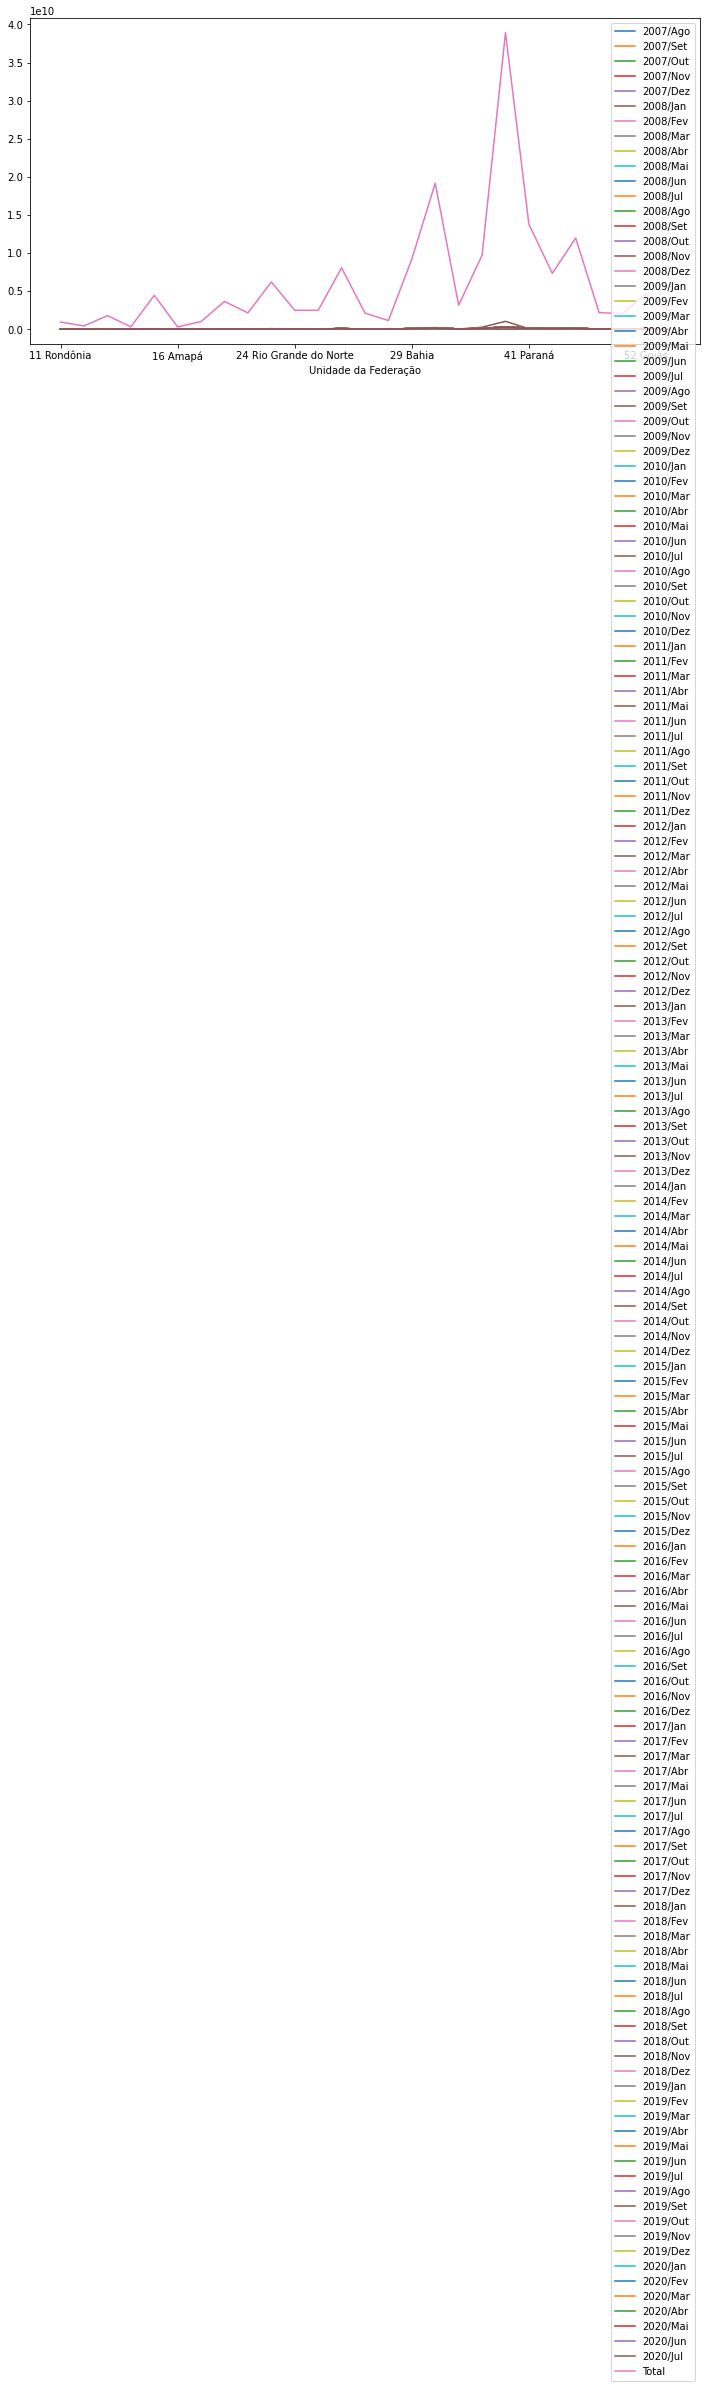

In [22]:
usaveis.plot(figsize = (12,6))

Pelo gráfico percebemos que seria impossível analisar com os estados compondo o eixo X e os meses compondo o eixo Y. Para resolver este problema, podemos transladar nosso dataset, onde os estados passariam a ser as colunas e os meses passariam a ser as linhas

In [23]:
usaveis_transladado = usaveis.T
usaveis_transladado.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2007/Ago,4209.37,10470.07,35752.72,4785.91,181159.29,33672.74,4113.76,385330.18,220788.25,357904.65,...,57408.11,469469.34,1665349.90,554800.22,693955.05,1049252.33,199556.12,63562.50,179395.82,191951.47
2007/Set,16397.03,14001.71,45570.64,11858.63,433414.74,104822.98,76633.06,1018352.93,353468.67,572356.18,...,284224.80,921646.57,4434168.64,1431708.01,1092964.12,3182913.14,573675.41,232444.62,418053.58,769966.25
2007/Out,133645.19,86200.85,416012.30,43852.67,1893197.50,118378.28,343702.61,2277717.78,1078182.68,1865065.71,...,1152115.25,2994664.57,14577395.84,4630402.44,3562300.82,8571312.11,1069816.66,927219.59,1198730.25,2165619.56
2007/Nov,346912.84,301323.68,2020381.79,369328.51,5105406.44,226661.18,1068685.94,4334468.23,2406035.32,5131814.39,...,2296383.23,7250528.08,35032259.98,11120030.79,7578502.38,16592432.80,1995899.52,1740439.60,2712117.54,3813256.48
2007/Dez,711758.31,769612.36,5949408.99,470676.43,13162823.43,844019.90,3022200.87,8832514.85,4929772.93,10798042.86,...,5724199.54,13627123.27,76668547.41,28790722.87,14772555.10,30134255.70,4277979.14,5394225.43,9293914.78,7121965.42


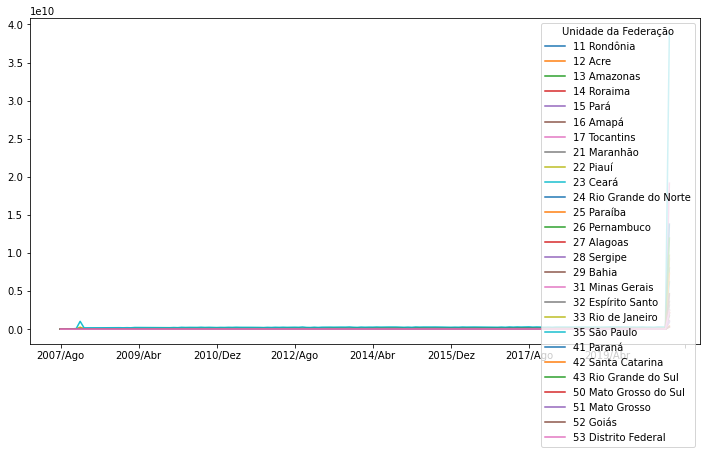

In [24]:
usaveis_transladado.plot(figsize=(12, 6))

Desta forma, temos uma linha para cada estado ao longo do tempo, porém o gráfico está completamente distorcido por conta da linha "Total" ao final da tabela, o que impossibilita a análise.

Podemos remover esta linha para deixar o gráfico mais limpo.

In [25]:
usaveis_transladado.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Abr,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42,23938156.77,11878587.16,43468816.62,...,23735724.64,68160773.35,251696362.66,96727112.19,51179993.45,76294596.96,15652772.51,11943713.53,27499307.93,18123899.78
2020/Mai,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56,32979447.97,14175053.45,54200339.48,...,28614683.75,86281033.16,302857660.98,106103737.62,56843604.33,86076113.42,16703851.10,13981483.29,31870107.62,21437430.22
2020/Jun,9193593.76,2199920.70,17509334.66,3216466.51,35396030.78,2699492.23,5018138.13,31128144.66,15375523.59,42146555.81,...,27450865.16,77604925.21,299060851.62,92901461.36,56503747.99,89019478.82,15838659.34,14585009.42,34437633.20,23479773.03
2020/Jul,7407388.24,1163813.08,13358514.02,2739498.41,27618727.51,2155083.37,4489665.87,24374205.15,18019214.49,30809221.22,...,27460475.47,71540227.33,282709570.31,80320852.69,51764534.76,78929703.81,12508717.35,13083151.70,33499284.38,22233542.26
Total,929129659.72,420668039.63,1771654871.23,305010883.18,4437115730.71,291637984.75,999998621.85,3632860959.84,2130616492.35,6197357245.98,...,3139189177.73,9696362872.68,38929353900.57,13786964617.27,7324100054.96,11958647088.33,2172157981.36,2036923784.59,4657348958.66,2429933198.76


In [26]:
usaveis_transladado = usaveis_transladado.drop("Total", axis = 0) #axis=0 é para buscar no eixo das linhas ao invés das colunas
usaveis_transladado.tail()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2020/Mar,7174312.31,2859102.06,14773739.41,2813954.05,34749098.46,2286241.46,7025821.12,28832662.46,15318975.43,46395356.97,...,26555688.68,73594497.93,276606288.92,114476997.52,56709962.09,84651396.59,17357008.80,14444207.60,34558308.52,19405446.88
2020/Abr,7423678.64,2472063.08,16330913.81,2304961.42,28714969.96,1774558.12,6204453.42,23938156.77,11878587.16,43468816.62,...,23735724.64,68160773.35,251696362.66,96727112.19,51179993.45,76294596.96,15652772.51,11943713.53,27499307.93,18123899.78
2020/Mai,8581195.13,2383895.48,19441150.53,2910776.44,41248502.78,2701014.87,6732370.56,32979447.97,14175053.45,54200339.48,...,28614683.75,86281033.16,302857660.98,106103737.62,56843604.33,86076113.42,16703851.10,13981483.29,31870107.62,21437430.22
2020/Jun,9193593.76,2199920.70,17509334.66,3216466.51,35396030.78,2699492.23,5018138.13,31128144.66,15375523.59,42146555.81,...,27450865.16,77604925.21,299060851.62,92901461.36,56503747.99,89019478.82,15838659.34,14585009.42,34437633.20,23479773.03
2020/Jul,7407388.24,1163813.08,13358514.02,2739498.41,27618727.51,2155083.37,4489665.87,24374205.15,18019214.49,30809221.22,...,27460475.47,71540227.33,282709570.31,80320852.69,51764534.76,78929703.81,12508717.35,13083151.70,33499284.38,22233542.26


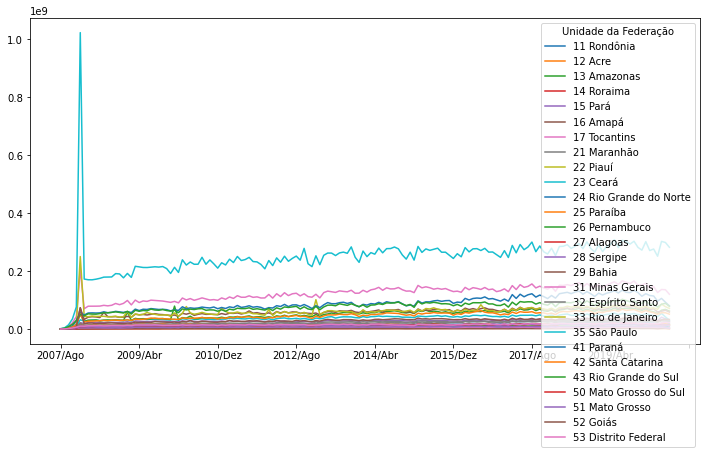

In [27]:
usaveis_transladado.plot(figsize=(12, 6))

#### Desafios Aula 02:
1. Reposicionar a legenda da forma mais adequada
2. Plotar o gráfico de linha para 5 estados de sua escolha
3. Plotar gráficos comparativos de cada região do País (desafio pessoal)

Conforme aprendemos na Aula 1, podemos melhorar o gráfico, para uma interpretação melhor do usuário, integrando o desafio de reposicionamento da legenda, como:
- Tirar os "outliers" do inicio do gráfico que ocorrem entre Agosto de 2007 e Janeiro de 2008
- Adicionar "Tickers" para melhor leitura do valor em reais
- Adicionar titulo e descrição dos eixos x e y
- Alterar o enquadramento do gráfico

Para reposicionar a legenda podemos utilizar o método "bbox_to_anchor" conforme o [site](https://python.docow.com/659/como-especificar-a-posicao-da-legenda-no-matplotlib-nas-coordenadas-do-grafico.html)

In [28]:
usaveis_transladado = usaveis_transladado.drop(['2007/Ago',
                                                '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan'], axis=0)

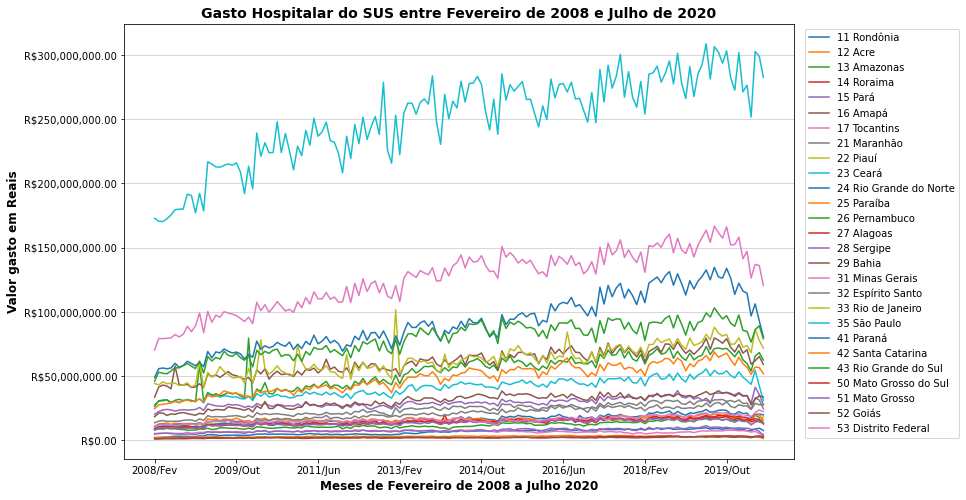

In [29]:
import numpy as np
ax = usaveis_transladado.plot(figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
plt.grid(linestyle='-', linewidth=0.5, axis = 'y')
plt.title('Gasto Hospitalar do SUS entre Fevereiro de 2008 e Julho de 2020', fontsize = 14, fontweight='bold')
ax.set_xlabel('Meses de Fevereiro de 2008 a Julho 2020', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor gasto em Reais', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.01,1))
plt.show()

Gráficos com muita informação como este, que contem todos os estados + Distrito Federal tendem a ficar muito sujos e dificultam o seu entendimento. Podemos visualizar melhor se agruparmos por grupos menores, baseado no tamanho do estado, população ou pela região em que se encontra.

Como foi pedido no desafio, escolhi plotar o gráfico para os 5 maiores estados brasileiros, sendo eles respectivamente: Amazonas, Pará, Mato Grosso, Minas Gerais e Bahia.

In [30]:
maiores_estados = usaveis_transladado.loc[:,["13 Amazonas", "15 Pará", "51 Mato Grosso",
                                             "31 Minas Gerais", "29 Bahia"]]
maiores_estados.head()

Unidade da Federação,13 Amazonas,15 Pará,51 Mato Grosso,31 Minas Gerais,29 Bahia
2008/Fev,7934652.10,20126081.01,7929894.93,70301089.50,33410124.06
2008/Mar,8641517.13,22149375.82,9416367.68,79119005.51,41301703.40
2008/Abr,8531576.49,23436682.75,9390588.03,79046322.41,42826993.62
2008/Mai,9079902.15,23861080.80,9378197.25,79268070.12,42071294.17
2008/Jun,8646295.77,23502915.90,9450300.60,79608652.53,39910042.40


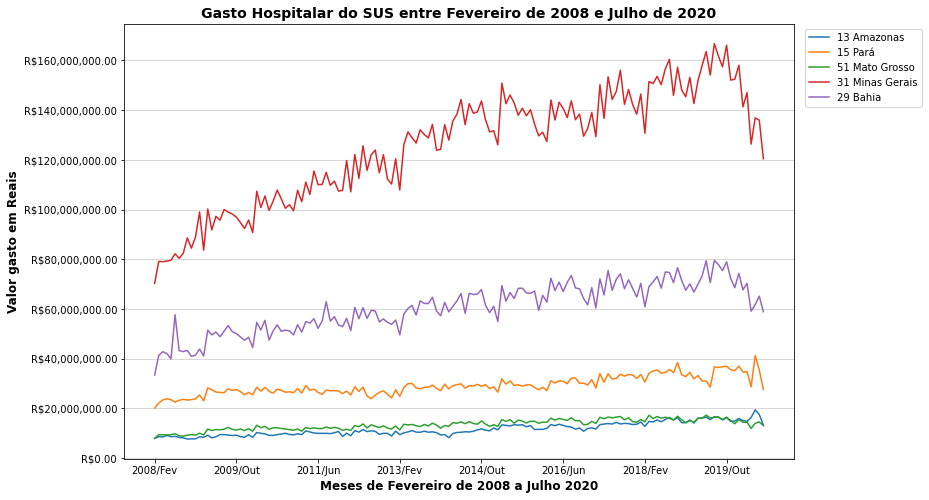

In [31]:
ax = maiores_estados.plot(figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
plt.grid(linestyle='-', linewidth=0.5, axis = 'y')
plt.title('Gasto Hospitalar do SUS entre Fevereiro de 2008 e Julho de 2020', fontsize = 14, fontweight='bold')
ax.set_xlabel('Meses de Fevereiro de 2008 a Julho 2020', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor gasto em Reais', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.01,1))
plt.show()

Pelo gráfico percebe-se que entre os cinco maiores estados do Brasil, Minas-Gerais é historicamente o estado que mais teve gastos com o SUS. Muito provavelmente por conta de sua população crescente. Ja os outros estados não parecem ter tido um crescimento dos gastos tão expressivo ao longo dos anos.

Para os gráficos por região, podemos perceber que os estados já estão organizados por região em nossa base de dados, basta "fatiar" nosso index nas regiões norte, nordeste, sudeste, sul e centro oeste.

In [32]:
norte = usaveis.index[:7] #poderia ser realizado utilizando o usaveis_transladado.columns
nordeste = usaveis.index[7:16]
sudeste = usaveis.index[16:20]
sul = usaveis.index[20:23]
centro_oeste = usaveis.index[23:]

#ver uma das novas tabelas
teste = usaveis_transladado[sul]
teste

Unidade da Federação,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul
2008/Fev,48855046.46,24409572.92,45897704.82
2008/Mar,55611791.07,27483480.50,52928695.92
2008/Abr,56115135.82,27806641.44,51972416.77
2008/Mai,55574831.93,28354279.52,51679350.79
2008/Jun,56094754.74,28993292.76,53759674.01
...,...,...,...
2020/Mar,114476997.52,56709962.09,84651396.59
2020/Abr,96727112.19,51179993.45,76294596.96
2020/Mai,106103737.62,56843604.33,86076113.42
2020/Jun,92901461.36,56503747.99,89019478.82


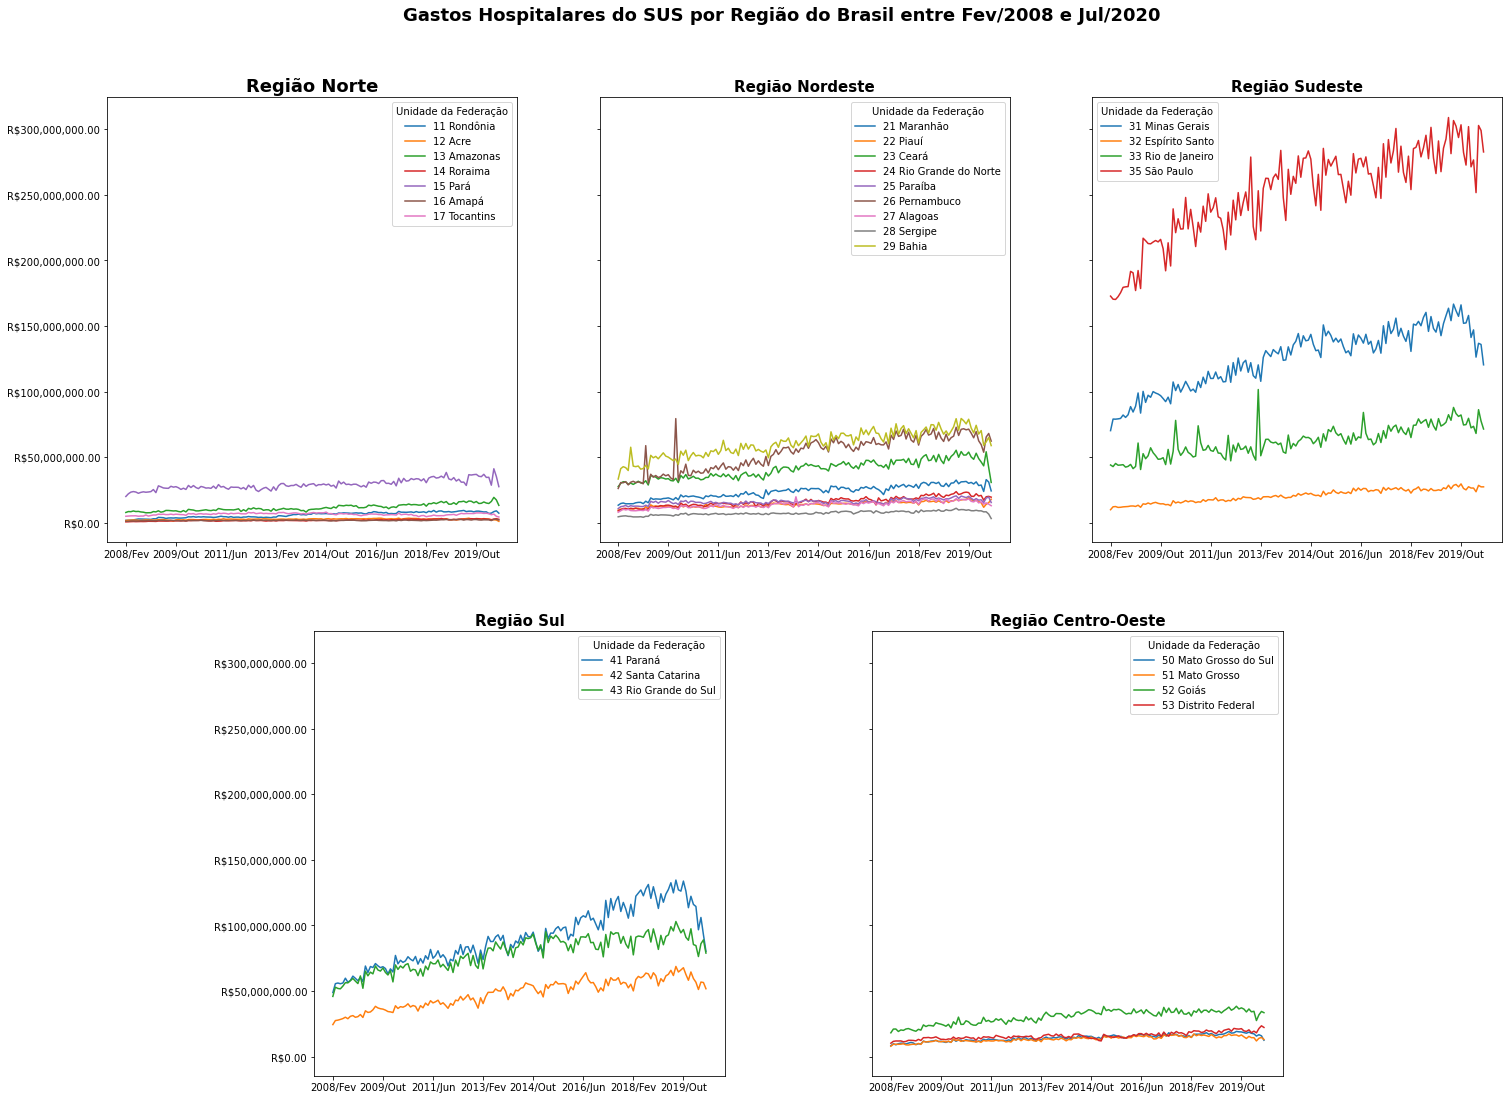

In [33]:

fig, axes = plt.subplots(2, 3, sharey = True, figsize = (25, 18))

axes[0, 0].set_title('Região Norte', fontsize = 18, fontweight='bold')
plt.suptitle("Gastos Hospitalares do SUS por Região do Brasil entre Fev/2008 e Jul/2020", 
             fontsize = 18,fontweight='bold', y=0.95)

axes[1, 2].set_visible(False)

usaveis_transladado[norte].plot(ax = axes[0, 0])
axes[0, 0].set_title('Região Norte', fontsize = 18, fontweight='bold')
axes[0, 0].yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))

usaveis_transladado[nordeste].plot(ax = axes[0, 1])
axes[0, 1].set_title('Região Nordeste', fontsize = 15, fontweight='bold')

usaveis_transladado[sudeste].plot(ax = axes[0, 2])
axes[0, 2].set_title('Região Sudeste', fontsize = 15, fontweight='bold')

usaveis_transladado[sul].plot(ax = axes[1, 0])
axes[1, 0].set_title('Região Sul', fontsize = 15, fontweight='bold')

usaveis_transladado[centro_oeste].plot(ax = axes[1, 1])
axes[1, 1].set_title('Região Centro-Oeste', fontsize = 15, fontweight='bold')

axes[1][0].set_position([0.24, 0.125, 0.228, 0.343])
axes[1][1].set_position([0.55, 0.125, 0.228, 0.343])


plt.show()

Os gráficos lado a lado não permitem uma análise tão profunda dos gastos de cada estado, porém esta análise por região permite ver claramente quais regiões mais gastam. Percebemos que a região que mais gasta é o Sudeste, em contra partida o Centro Oeste e o Norte estão bem parecidos em relação aos gastos de seus estados.

#### Lições Aprendidas
- Como realizar um slice no DataFrame com Pandas;
- Formas de lidar com dados faltantes;
- Utilizar o insert do Pandas;
- Como transpor sua matriz de dados.

### *Aula 03* - Manipulação de dados

Começamos a aula aprendendo como acessar colunas ou index especificos do nosso dataset para fazer "slicing"(fatiamento) do dataset para manipulação, como fizemos anteriormente para separar nossa base de dados por região (norte, sul, sudeste, nordeste e centro-oeste)

In [34]:
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


In [35]:
usaveis_transladado.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
2008/Fev,1940792.63,1743978.66,7934652.10,771687.83,20126081.01,1275063.72,5051932.07,13452263.93,9711680.20,27643304.86,...,10032886.43,44122593.19,172834914.73,48855046.46,24409572.92,45897704.82,8279288.79,7929894.93,18149374.27,10215956.80
2008/Mar,1955721.68,2057439.02,8641517.13,876091.18,22149375.82,1177745.93,5200151.87,14750895.33,10428191.09,30085370.22,...,12262049.08,42892665.52,170481849.56,55611791.07,27483480.50,52928695.92,9793888.78,9416367.68,20992213.03,11627918.26
2008/Abr,2143353.81,2057829.69,8531576.49,896952.53,23436682.75,1396371.51,5343714.73,15148647.11,10227943.00,31376221.00,...,12453466.98,45295962.86,170278285.95,56115135.82,27806641.44,51972416.77,8997542.75,9390588.03,21049477.30,11922015.36
2008/Mai,2280382.58,2226577.93,9079902.15,1027288.73,23861080.80,1411520.77,5344487.99,14543679.92,10562148.66,31189904.62,...,11789786.09,43951349.46,172402180.59,55574831.93,28354279.52,51679350.79,9842108.59,9378197.25,19162546.79,11900817.00
2008/Jun,2624542.97,2112576.82,8646295.77,938293.54,23502915.90,1420892.01,5398413.09,14553978.06,10465088.93,29463965.11,...,11889687.35,44102925.77,175416595.83,56094754.74,28993292.76,53759674.01,10257782.00,9450300.60,20332533.92,11969271.76


In [36]:
usaveis_transladado.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [37]:
usaveis_transladado.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [38]:
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [39]:
usaveis[:5]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,305010883.18
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4437115730.71


In [40]:
usaveis = usaveis.drop("Total", axis=1)

Podemos utilizar este método de slicing para plotar colunas ou linhas especificas do gráfico, Como utiliziamos anteriormente, vamos plotar o gráfico da região norte do Brasil

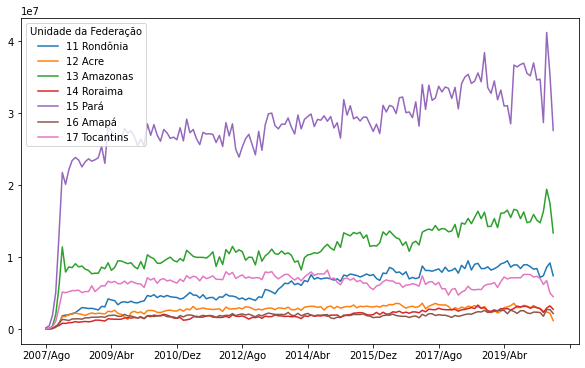

In [41]:
usaveis[:7].T.plot(figsize=(10,6))

Podemos analisar outras formas de realizar esse slicing do nosso dataset

O método sample() por exemplo trás um fatiamento pseudo-aletório

In [42]:
usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
15 Pará,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,23861080.80,...,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,...,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37
22 Piauí,220788.25,353468.67,1078182.68,2406035.32,4929772.93,11375419.37,9711680.20,10428191.09,10227943.00,10562148.66,...,19155508.31,17649092.71,16846903.02,17312889.65,16264613.57,15318975.43,11878587.16,14175053.45,15375523.59,18019214.49
21 Maranhão,385330.18,1018352.93,2277717.78,4334468.23,8832514.85,21551600.33,13452263.93,14750895.33,15148647.11,14543679.92,...,30157243.62,30849081.57,29632234.87,31256187.80,28457299.99,28832662.46,23938156.77,32979447.97,31128144.66,24374205.15
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,...,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34


Para que a sequencia pseudo-aleatória seja igual precisamos que a "semente" seja a mesma. Desta forma a sequencia pseudo-aleatória se reproduzirá igualmente em qualquer ambiente

In [43]:
import numpy as np
np.random.seed(687942)

usaveis.sample(n=7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,...,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,...,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,...,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7587986.90,7594175.34,7573064.95,7225320.39,7341171.88,7025821.12,6204453.42,6732370.56,5018138.13,4489665.87
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26
50 Mato Grosso do Sul,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,9842108.59,...,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37


#### Desafio Aula 03:
1. Adicionar uma coluna mostrando a região de cada estado

Como mostrado na aula, podemos criar uma lista com as regiões prontas e inseri-las em uma coluna a ser criada

In [44]:
norte = ["Norte"] * 7
nordeste = ["Nordeste"] * 9
sudeste = ['Sudeste'] * 4
sul = ["Sul"] * 3
centro_oeste = ["Centro Oeste"] * 4

regioes = norte + nordeste + sudeste + sul + centro_oeste

usaveis.insert(0, 'Regiao', regioes)

In [45]:
usaveis.tail()

,Regiao,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
43 Rio Grande do Sul,Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,...,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81
50 Mato Grosso do Sul,Centro Oeste,199556.12,573675.41,1069816.66,1995899.52,4277979.14,8301006.10,8279288.79,9793888.78,8997542.75,...,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35
51 Mato Grosso,Centro Oeste,63562.50,232444.62,927219.59,1740439.60,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,...,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70
52 Goiás,Centro Oeste,179395.82,418053.58,1198730.25,2712117.54,9293914.78,74063828.22,18149374.27,20992213.03,21049477.30,...,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38
53 Distrito Federal,Centro Oeste,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,...,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26


Podemos agora, adicionar novamente a coluna "Total" com o gasto total ao longo de todos os meses de cada estado para realizar algumas análises

In [46]:
usaveis["Total"] = usaveis.sum(axis = 1)
usaveis.head()

,Regiao,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,925572673.82
12 Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,420666755.81
13 Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,1766925554.09
14 Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,303485991.45
15 Pará,Norte,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,4425537480.57


Podemos ordenar os estados pelo total gasto em ordem decrescente e armazenar em uma variável "ordenado_total", e logo após remover a coluna Total novamente.

In [47]:
ordenado_total = usaveis.sort_values("Total", ascending=False)
ordenado_total = ordenado_total.drop("Total", axis = 1)
ordenado_total.head()

,Regiao,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,...,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,Sudeste,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,...,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,Sul,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,...,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,...,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81
33 Rio de Janeiro,Sudeste,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,...,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33


In [48]:
ordenado_total = ordenado_total.drop('Regiao', axis=1) #Remover a Região para criação do gráfico transposto

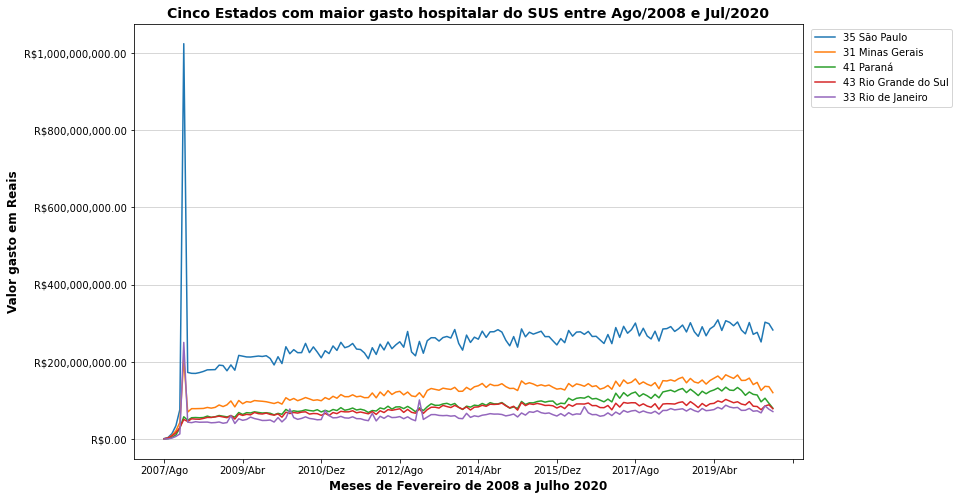

In [49]:
ax = ordenado_total.head(5).T.plot(figsize = (12,8))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
plt.grid(linestyle='-', linewidth=0.5, axis = 'y')
plt.title('Cinco Estados com maior gasto hospitalar do SUS entre Ago/2008 e Jul/2020', fontsize = 14, fontweight='bold')
ax.set_xlabel('Meses de Fevereiro de 2008 a Julho 2020', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor gasto em Reais', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.23,1))
plt.show()

#### Desafio Aula 03:
2. Escolher uma paleta de cores mais adequada no Matplotlib
3. Adicionar seu estado aos 5 mostrados anteriormente

Começamos o desafio adicionando o Estado em que resido, o Distrito Federal a uma lista com os 5 estados que mais gastaram ao longo dos anos

In [50]:
desafio = ordenado_total.head(5)
desafio = desafio.append(ordenado_total.loc['53 Distrito Federal'])
desafio

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,...,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,...,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,...,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03,45897704.82,52928695.92,51972416.77,51679350.79,...,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,250564959.99,44122593.19,42892665.52,45295962.86,43951349.46,...,82247728.87,74620476.61,74895861.63,79705663.75,72412810.42,73594497.93,68160773.35,86281033.16,77604925.21,71540227.33
53 Distrito Federal,191951.47,769966.25,2165619.56,3813256.48,7121965.42,10561085.46,10215956.80,11627918.26,11922015.36,11900817.00,...,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26


Podemos retirar novamente os estados que causam uma distorção do gráfico e atrapalham a análise dos resultados

In [51]:
desafio = desafio.drop(['2007/Ago', '2007/Set', '2007/Out', '2007/Nov', '2007/Dez', '2008/Jan'], axis = 1)

Finalmente, podemos plotar o gráfico da forma como ja realizamos em etapas anteriores do BootCamp

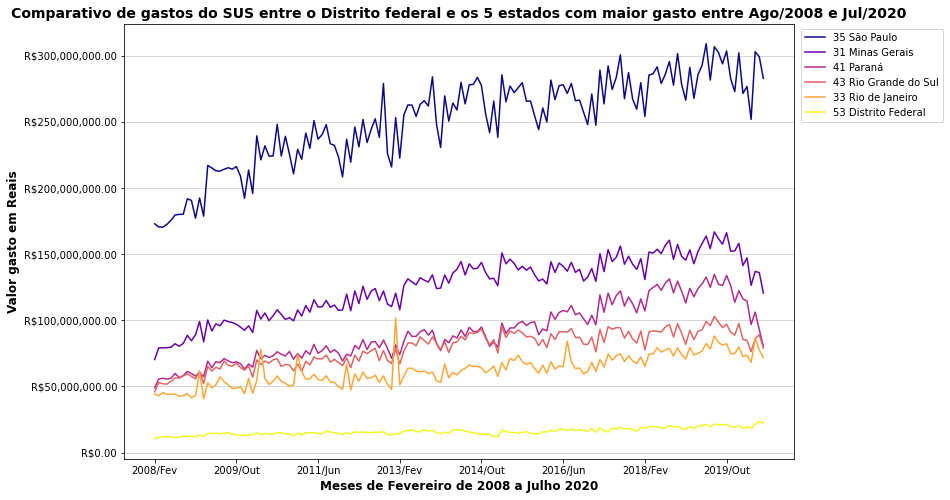

In [52]:
ax = desafio.T.plot(figsize = (12,8), colormap='plasma')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
plt.grid(linestyle='-', linewidth=0.5, axis = 'y')
plt.title('Comparativo de gastos do SUS entre o Distrito federal e os 5 estados com maior gasto entre Ago/2008 e Jul/2020'
          , fontsize = 14, fontweight='bold')
ax.set_xlabel('Meses de Fevereiro de 2008 a Julho 2020', fontsize=12, fontweight='bold')
ax.set_ylabel('Valor gasto em Reais', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.23,1))
plt.show()

#### Desafios Aula 03:
3. Buscar os casos de dengue no Brasil (época de maior número de casos e regiões atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral podem ser reflexos destes casos
4. Plotar o gráfico de custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região
5. Adicionar o seu estado novamente e compara-lo com os outros estados.

Para o desafio 3, podemos buscar os casos relacionados a dengue no mesmo site do [DataSUS](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def) onde retiramos os dados do gastos, utilizados nas análises anteriores.

Iremos selecionar, "Unidade da Federação" na Linha, "Ano/mês atendimento" na Coluna, "Internações" no Conteúdo e selecionar todo o período disponível.

Para limitar os procedimentos apenas aos casos relacionados a dengue, clicaremos em "procedimentos para expandir e buscar por "Dengue" na caixa de busca, podemos selecionar todas as opções e clicar em OK. Assim teremos a quantidade de internações feitas com procedimentos relacionados a dengue.

Segue uma imagem ilustrativa de como deve ser preenchido os dados:

![tabnet.jpeg](../dados/tabnet.jpeg)

In [53]:
# Importação dos dados

dados_dengue = pd.read_csv("../dados/dengue_dados.csv", encoding= "ISO-8859-1",
                   skiprows = 4, sep=";",skipfooter = 12, engine='python', thousands=".", decimal=",")

dados_dengue.head() #exibir as 5 primeiras linhas

,Unidade da Federação,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,2,77,202,237,237,...,15,7,12,16,10,20,12,16,4,22386
1,12 Acre,-,-,-,-,1,3,15,13,12,...,5,3,8,7,27,92,67,95,47,4793
2,13 Amazonas,-,-,-,-,1,61,175,246,248,...,20,17,6,14,30,39,43,56,52,6490
3,14 Roraima,-,-,-,-,-,-,7,13,32,...,1,1,-,-,-,-,-,-,-,4069
4,15 Pará,-,4,12,38,163,610,1382,1324,1274,...,3,11,8,8,11,15,17,30,22,50949


Para começar a trabalhar com esta base de dados, podemos deixa-la um pouco mais limpa, vamos:
- Setar a "Unidade da Federação" como index
- Ordenar os casos de dengue pelo Total de internações
- substituir os "-" por 0
- remover a coluna "Total"

In [54]:
dados_dengue = dados_dengue.set_index("Unidade da Federação")
dados_dengue.head()

,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,-,-,-,-,2,77,202,237,237,209,...,15,7,12,16,10,20,12,16,4,22386
12 Acre,-,-,-,-,1,3,15,13,12,24,...,5,3,8,7,27,92,67,95,47,4793
13 Amazonas,-,-,-,-,1,61,175,246,248,209,...,20,17,6,14,30,39,43,56,52,6490
14 Roraima,-,-,-,-,-,-,7,13,32,90,...,1,1,-,-,-,-,-,-,-,4069
15 Pará,-,4,12,38,163,610,1382,1324,1274,1385,...,3,11,8,8,11,15,17,30,22,50949


In [55]:
dados_dengue = dados_dengue.replace("-", 0)
dados_dengue = dados_dengue.astype("float64") #as colunas viram valores numéricos

In [56]:
dados_dengue = dados_dengue.sort_values("Total", ascending=False)
dados_dengue = dados_dengue.drop("Total", axis = 1)

In [57]:
dados_dengue.head()

,2007/Jul,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
29 Bahia,0.00,0.00,1.00,17.00,36.00,81.00,247.00,291.00,961.00,2243.00,...,330.00,153.00,56.00,52.00,59.00,30.00,36.00,75.00,67.00,51.00
52 Goiás,0.00,1.00,3.00,10.00,32.00,158.00,509.00,583.00,1108.00,1519.00,...,142.00,54.00,29.00,29.00,24.00,23.00,39.00,39.00,76.00,44.00
31 Minas Gerais,0.00,0.00,0.00,0.00,2.00,21.00,63.00,105.00,370.00,919.00,...,117.00,64.00,35.00,22.00,37.00,33.00,34.00,40.00,54.00,54.00
35 São Paulo,0.00,0.00,0.00,1.00,7.00,30.00,82.00,85.00,189.00,313.00,...,106.00,57.00,39.00,41.00,37.00,30.00,37.00,105.00,223.00,216.00
23 Ceará,0.00,1.00,6.00,11.00,34.00,89.00,445.00,931.00,1528.00,2376.00,...,191.00,206.00,132.00,71.00,44.00,61.00,36.00,42.00,46.00,37.00


Os dados de 2007, não aparecem em nossa consulta geral, o que acaba por não fazer sentido uma análise, ja que não temos outros dados para comparação, podemos assim limitar a tabela para ter as linhas apenas dos meses que temos em nossa base de dados do SUS.

In [58]:
dados_dengue = dados_dengue[desafio.columns] #desafio é a tabela que utilizamos em nossa análise mais recente

Agora nossa base de dados dos casos de dengue está pronta para ser visualizada

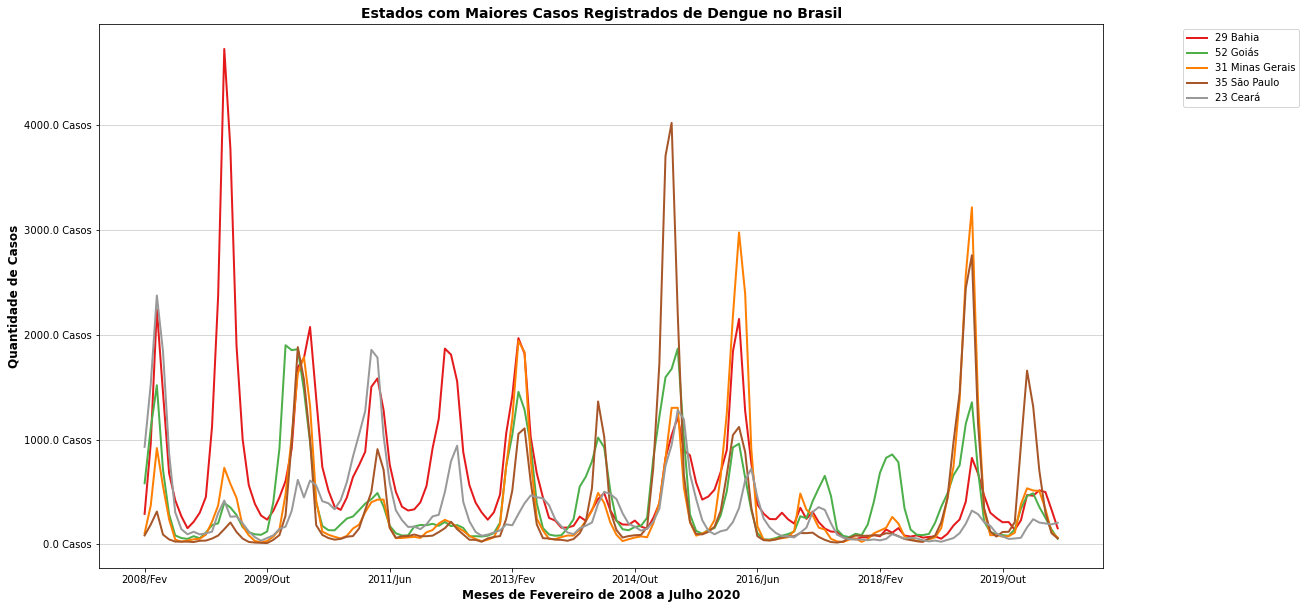

In [59]:
top5_casos_dengue = dados_dengue.head(5)
ax = top5_casos_dengue.T.plot(figsize = (18,10), colormap='Set1', linewidth=2.0)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x} Casos"))
plt.grid(linestyle='-', linewidth=0.5, axis = 'y')
plt.title('Estados com Maiores Casos Registrados de Dengue no Brasil'
          , fontsize = 14, fontweight='bold')
ax.set_xlabel('Meses de Fevereiro de 2008 a Julho 2020', fontsize=12, fontweight='bold')
ax.set_ylabel('Quantidade de Casos', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.2,1))
plt.show()

Percebemos que existe uma certa sazonalidade entre os meses, na quantidade de casos registrados de dengue, provavelmente por conta das principais épocas de chuva de cada estado.

Para o próximo desafio, podemos plotar o gráfico para cada estado do Sudeste, comparando com seu gasto hospitalar para o mesmo intervalo de tempo

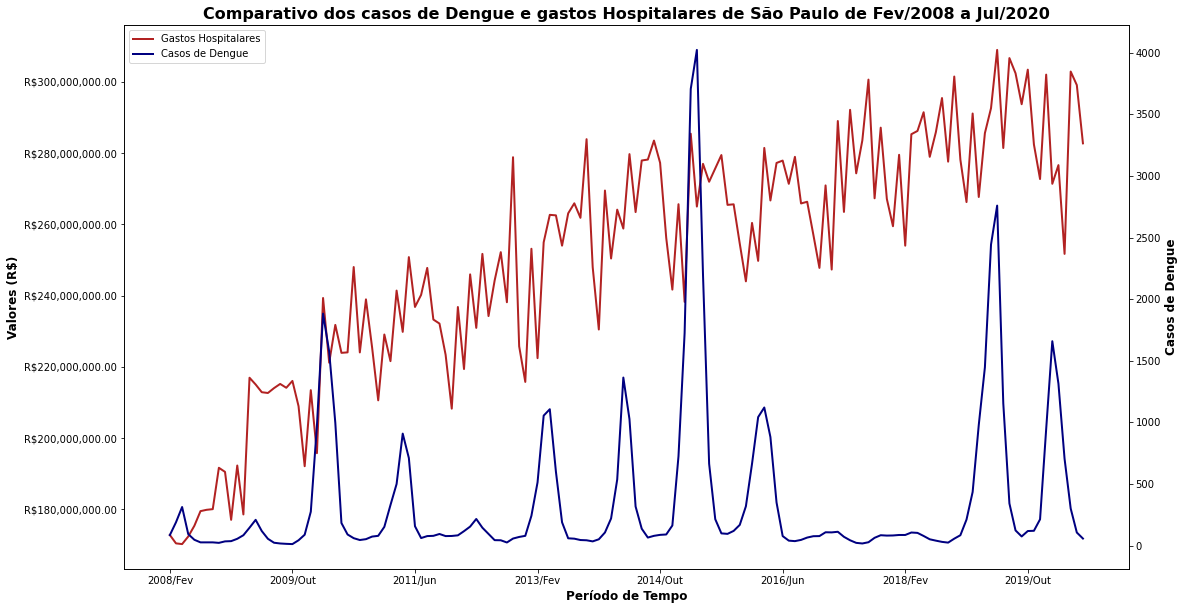

In [60]:
fig, axs = plt.subplots(figsize = (18, 10))

plt.title('Comparativo dos casos de Dengue e gastos Hospitalares de São Paulo de Fev/2008 a Jul/2020', fontsize=16, fontweight='bold')

desafio.loc['35 São Paulo'].T.plot(color = 'firebrick', linewidth = 2.0)
axs.set_xlabel( 'Período de Tempo', fontsize=12, fontweight='bold')
axs.set_ylabel('Valores (R$)', fontsize=12, fontweight='bold')

axs2 = axs.twinx()
dados_dengue.loc['35 São Paulo'].T.plot(color = 'navy', linewidth = 2.0)
axs2.set_ylabel('Casos de Dengue', fontsize=12, fontweight='bold')

axs.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))

custom_lines = [Line2D([0], [0], color = 'firebrick', lw = 2), Line2D([0], [0], color = 'navy', lw = 2)]
axs.legend(custom_lines, ['Gastos Hospitalares', 'Casos de Dengue'])

plt.show()

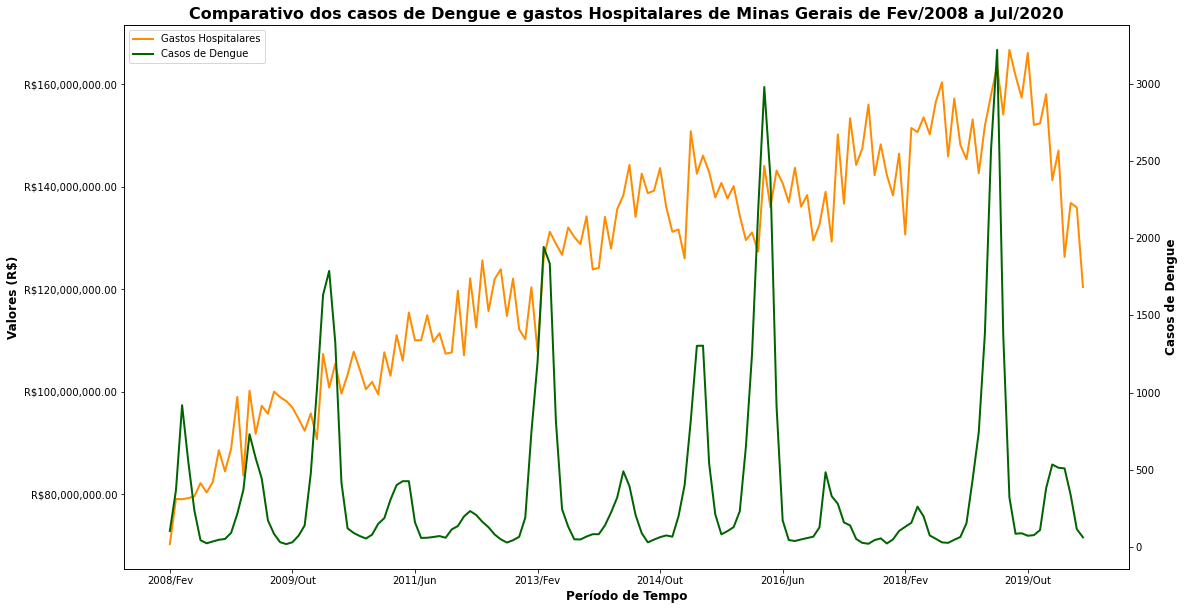

In [61]:
fig, axs = plt.subplots(figsize = (18, 10))

plt.title('Comparativo dos casos de Dengue e gastos Hospitalares de Minas Gerais de Fev/2008 a Jul/2020', fontsize=16, fontweight='bold')

desafio.loc['31 Minas Gerais'].T.plot(color = 'darkorange', linewidth = 2.0)
axs.set_xlabel( 'Período de Tempo', fontsize=12, fontweight='bold')
axs.set_ylabel('Valores (R$)', fontsize=12, fontweight='bold')

axs2 = axs.twinx()
dados_dengue.loc['31 Minas Gerais'].T.plot(color = 'darkgreen', linewidth = 2.0)
axs2.set_ylabel('Casos de Dengue', fontsize=12, fontweight='bold')

axs.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))

custom_lines = [Line2D([0], [0], color = 'darkorange', lw = 2), Line2D([0], [0], color = 'darkgreen', lw = 2)]
axs.legend(custom_lines, ['Gastos Hospitalares', 'Casos de Dengue'])

plt.show()

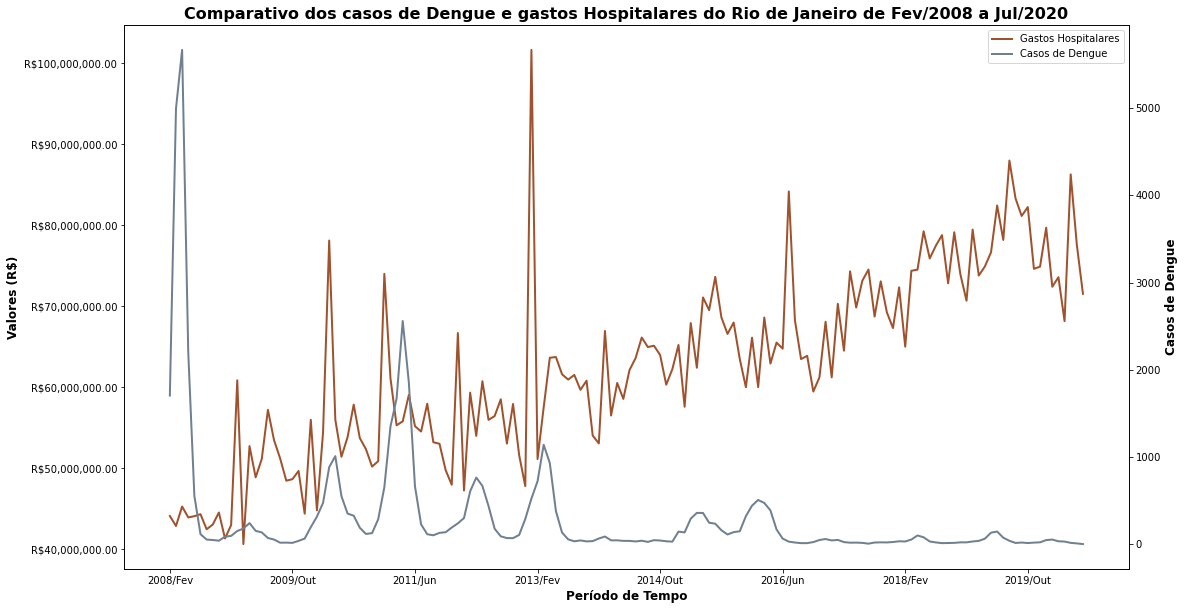

In [62]:
fig, axs = plt.subplots(figsize = (18, 10))

plt.title('Comparativo dos casos de Dengue e gastos Hospitalares do Rio de Janeiro de Fev/2008 a Jul/2020', fontsize=16, fontweight='bold')

desafio.loc['33 Rio de Janeiro'].T.plot(color = 'sienna', linewidth = 2.0)
axs.set_xlabel( 'Período de Tempo', fontsize=12, fontweight='bold')
axs.set_ylabel('Valores (R$)', fontsize=12, fontweight='bold')

axs2 = axs.twinx()
dados_dengue.loc['33 Rio de Janeiro'].T.plot(color = 'slategray', linewidth = 2.0)
axs2.set_ylabel('Casos de Dengue', fontsize=12, fontweight='bold')

axs.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))

custom_lines = [Line2D([0], [0], color = 'sienna', lw = 2), Line2D([0], [0], color = 'slategray', lw = 2)]
axs.legend(custom_lines, ['Gastos Hospitalares', 'Casos de Dengue'])

plt.show()

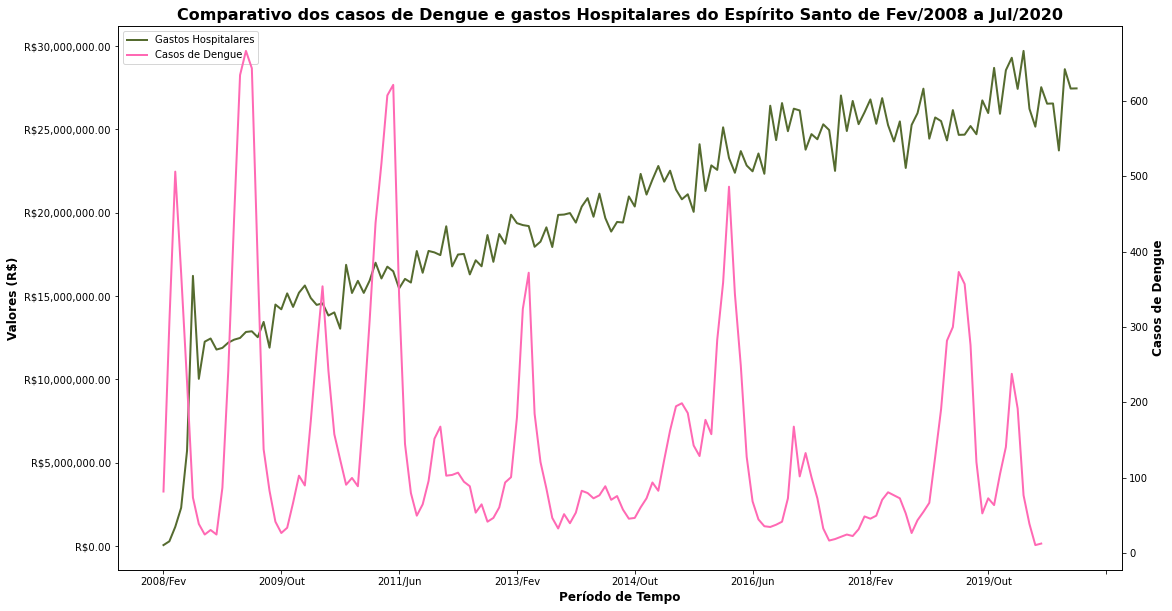

In [63]:
fig, axs = plt.subplots(figsize = (18, 10))

plt.title('Comparativo dos casos de Dengue e gastos Hospitalares do Espírito Santo de Fev/2008 a Jul/2020', fontsize=16, fontweight='bold')

ordenado_total.loc["32 Espírito Santo"].T.plot(color = 'darkolivegreen', linewidth = 2.0)
axs.set_xlabel( 'Período de Tempo', fontsize=12, fontweight='bold')
axs.set_ylabel('Valores (R$)', fontsize=12, fontweight='bold')

axs2 = axs.twinx()
dados_dengue.loc["32 Espírito Santo"].T.plot(color = 'hotpink', linewidth = 2.0)
axs2.set_ylabel('Casos de Dengue', fontsize=12, fontweight='bold')

axs.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))

custom_lines = [Line2D([0], [0], color = 'darkolivegreen', lw = 2), Line2D([0], [0], color = 'hotpink', lw = 2)]
axs.legend(custom_lines, ['Gastos Hospitalares', 'Casos de Dengue'])

plt.show()

Pelos gráficos da Região Sudeste, percebemos uma certa elevação nos gastos hospitalares nos estados de São Paulo e Rio de Janeiro em Fevereiro de 2013, porém não se repete para Minas Gerais e Espirito Santo.

Percebemos também que, tirando Minas Gerais, os casos de dengue tem diminuido (considerando 2014 como média) nos estados da região, enquanto os gastos hospitalares do SUS tem aumentado, o que pode indicar que o motivo dos maiores gastos não estão relacionados a dengue.

Outra observação é em relação aos ciclos da dengue, que aparentam ocorrer um pouco depois dos picos de gastos, o que pode indicar uma "precipitação do governo" em para preparação do ciclo de alta da dengue.

#### O que aprendemos:
- Como números pseudo aleatórios são gerados;
- Como obter uma amostra aleatória dos dados;
- Como manipular os dados para plotar informações dos estados de desejo, através de ordenação;
- O que são séries temporais;

### Aula 4  - *Análise de gráficos e criação de hipóteses*

Podemos dividir o valor dos gastos por 1 milhão para reduzir a escala do gráfico

In [64]:
ordenado_total = ordenado_total.drop(["2007/Ago", "2007/Set", "2007/Out", "2007/Nov", "2007/Dez", "2008/Jan"], axis = 1)

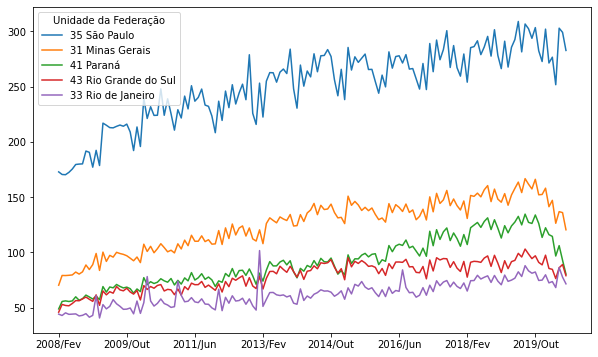

In [65]:
ordenado_total = ordenado_total / 1000000
ordenado_total.head(5).T.plot(figsize=(10,6))

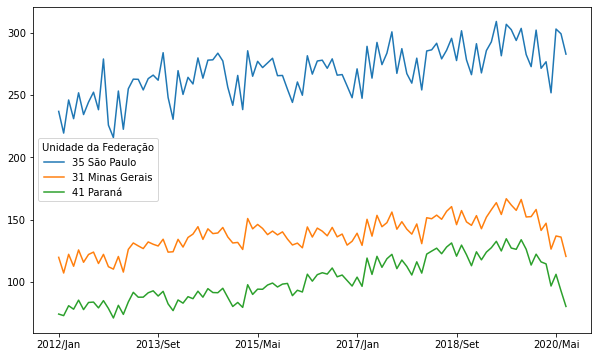

In [66]:
meses_filtrados = ordenado_total.columns[47:150]
ordenado_total[meses_filtrados].head(3).T.plot(figsize=(10,6))

Observando os dois gráficos, percebemos uma distorção quando comparamos o Paraná e São Paulo, onde visivelmente, no primeiro gráfico, São Paulo parece ter um gasto 3 vezes maior que o Paraná, enquanto pelo segundo gráfico São Paulo parece ter um gasto 4 vezes maior que o Paraná.

Podemos limitar o gráfico para observar como a escala influencia visualmente o gráfico.

(0.0, 350.0)

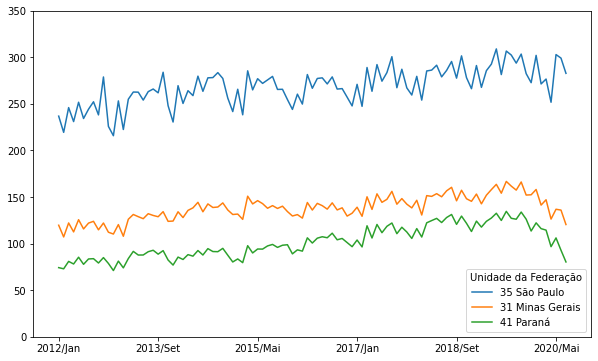

In [67]:
ordenado_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(0,350)

Desta forma, temos a ilusão de que São Paulo gastou 2x mais que o Paraná, podemos modificar os limites para ver como essa ilusão pode ser alterada a todo instante.

(100.0, 350.0)

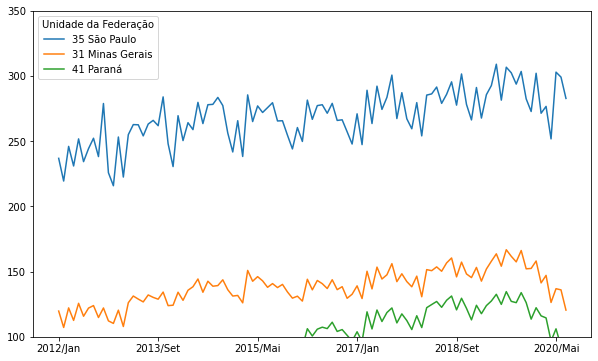

In [68]:
ordenado_total[meses_filtrados].head(3).T.plot(figsize=(10,6))
plt.ylim(100,350)

Neste gráfico, temos a ilusão de que São Paulo gastou 10x mais que o Paraná

#### Desafios Aula 4
1. Refaça as manipulações feitas em aula e procure analisar os dados entendendo os efeitos das manipulações
2. Reflita sobre os problemas na manipulação de dados e discuta no Discord

#### O que aprendemos nessa Aula:
- Como olhar e interpretar um fráfico de linha, realizando comparações
- Como a manipulação dos gráficos pode transmitir uma informação falsa

### Aula 5 - *Manipulação e interpretação de gráficos*

In [69]:
mes_mais_recente = ordenado_total.columns[-1]
mes_mais_recente

'2020/Jul'

É esperado que tenha uma queda nos ultimos meses, pois leva um tempo para o processamento dos dados dos meses anteriores. Provavelmente os dados de 2020 serão maiores, ao longo dos proximos meses de 2021, quando forem atualizando e processando estes dados.

Podemos buscar formas de visualizar este dado para cada estado

In [70]:
gastos_mais_recente = ordenado_total[mes_mais_recente]
gastos_mais_recente.head()

Unidade da Federação
35 São Paulo           282.71
31 Minas Gerais        120.47
41 Paraná               80.32
43 Rio Grande do Sul    78.93
33 Rio de Janeiro       71.54
Name: 2020/Jul, dtype: float64

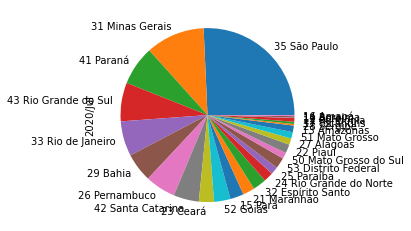

In [71]:
gastos_mais_recente.plot(kind='pie')

"Se o gráfico tem nome de comida, você não deveria usa-lo"

Desvantagens:
- legenda está horrivel
- Inúmeras fatias

Vantagens:
- O gráfico ja veio ordenado


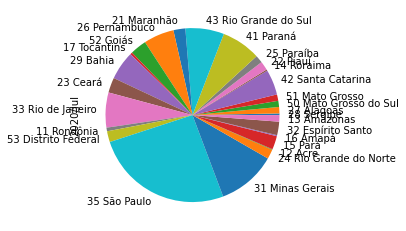

In [72]:
gastos_mais_recente.sample(frac = 1).plot(kind = 'pie')

Desvantagens: 
- Legenda horrivel
- Inúmeras Fatias
- Cores repetidas
- Ruim para definir ordem
- Péssima para comparação

In [73]:
#visualização simples para valor absoluto

gastos_mais_recente

Unidade da Federação
35 São Paulo             282.71
31 Minas Gerais          120.47
41 Paraná                 80.32
43 Rio Grande do Sul      78.93
33 Rio de Janeiro         71.54
29 Bahia                  58.90
26 Pernambuco             62.33
42 Santa Catarina         51.76
23 Ceará                  30.81
52 Goiás                  33.50
15 Pará                   27.62
21 Maranhão               24.37
32 Espírito Santo         27.46
24 Rio Grande do Norte    19.59
25 Paraíba                15.49
53 Distrito Federal       22.23
50 Mato Grosso do Sul     12.51
22 Piauí                  18.02
27 Alagoas                13.09
51 Mato Grosso            13.08
13 Amazonas               13.36
28 Sergipe                 3.31
17 Tocantins               4.49
11 Rondônia                7.41
12 Acre                    1.16
14 Roraima                 2.74
16 Amapá                   2.16
Name: 2020/Jul, dtype: float64

Podemos utilizar a tabela para mostrar uma tabela de comparação com algum estado

In [74]:
gastos_mais_recente / gastos_mais_recente.loc["33 Rio de Janeiro"]

Unidade da Federação
35 São Paulo             3.95
31 Minas Gerais          1.68
41 Paraná                1.12
43 Rio Grande do Sul     1.10
33 Rio de Janeiro        1.00
29 Bahia                 0.82
26 Pernambuco            0.87
42 Santa Catarina        0.72
23 Ceará                 0.43
52 Goiás                 0.47
15 Pará                  0.39
21 Maranhão              0.34
32 Espírito Santo        0.38
24 Rio Grande do Norte   0.27
25 Paraíba               0.22
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.17
22 Piauí                 0.25
27 Alagoas               0.18
51 Mato Grosso           0.18
13 Amazonas              0.19
28 Sergipe               0.05
17 Tocantins             0.06
11 Rondônia              0.10
12 Acre                  0.02
14 Roraima               0.04
16 Amapá                 0.03
Name: 2020/Jul, dtype: float64

Outra forma de realizar essa representação é utilizando o gráfico em barra

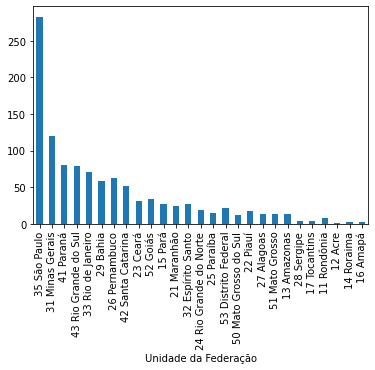

In [75]:
gastos_mais_recente.plot(kind = 'bar')

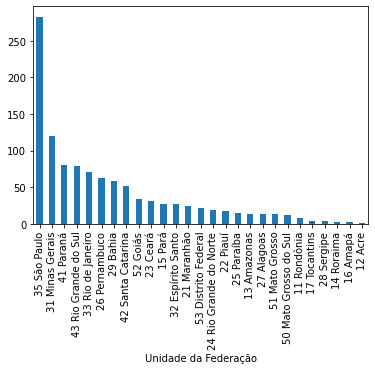

In [76]:
gastos_mais_recente = gastos_mais_recente.sort_values(ascending=False)
gastos_mais_recente.plot(kind = 'bar')

#### Aula 5 - Desafios
1. Buscar na Documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.
2. Fazer uma tabela do gasto dos outros estados em função do seu estado.
3. Fazer o Cálculo proporcional a população do seu estado e mais um a escolha
4. Faça uma análise dos dados, levantando hipóteses
5. Reproduza as análises feitas em aula.

Para criar a tabela em função do meu estado, basta seguir o passo realizado com o Rio de Janeiro durante a aula

In [77]:
gastos_df = (gastos_mais_recente / gastos_mais_recente.loc["53 Distrito Federal"]).to_frame()
gastos_df

,2020/Jul
Unidade da Federação,
35 São Paulo,12.72
31 Minas Gerais,5.42
41 Paraná,3.61
43 Rio Grande do Sul,3.55
33 Rio de Janeiro,3.22
26 Pernambuco,2.80
29 Bahia,2.65
42 Santa Catarina,2.33
52 Goiás,1.51


Ja estavamos utilizando a função .grid() do matplotlib para realizar os gráficos dos desafios anteriores, podemos plotar o gráfico dos gasto em comparação com o Distrito Federal

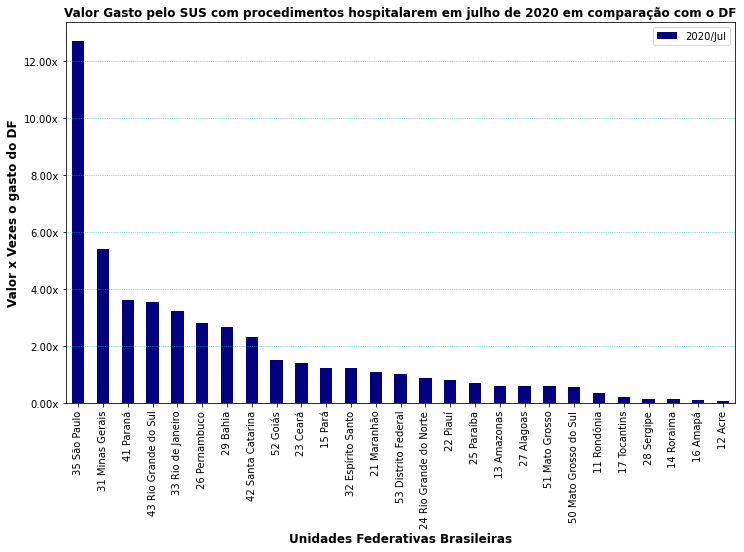

In [78]:
ax = gastos_df.plot(kind = "bar",color = "#000080" ,figsize = (12,7))
plt.grid(color='c', linestyle=':', linewidth=.7, axis = 'y')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}x"))
plt.xlabel("Unidades Federativas Brasileiras", fontdict={'fontsize': 12, "fontweight": "bold"})
plt.ylabel("Valor x Vezes o gasto do DF", fontdict={'fontsize': 12, "fontweight": "bold"})
plt.title("Valor Gasto pelo SUS com procedimentos hospitalarem em julho de 2020 em comparação com o DF",fontweight= "bold")
plt.show()

Para realizar a análise por População, foi baixado o Estudo de estimativas populacionais por munincipio do [DATASUS](http://www2.datasus.gov.br/DATASUS/index.php?area=0206&id=6942), de forma similar a realizada em etapas anteriores do curso.

In [79]:
# Importação dos dados

dados_pop = pd.read_csv("../dados/estimativa_populacao.csv", encoding= "ISO-8859-1"
                        ,skiprows=2, skipfooter = 4, sep=";", engine='python')

dados_pop.head() #exibir as 5 primeiras linhas

,,,,,,,,,,,,,Período:2008-2020
Unidade da Federação,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
11 Rondônia,1566588,1582874,1598634,1618210,1637884,1657620,1677766,1698263,1717911,1737578,1757589,1777225,1796460
12 Acre,730523,748586,765325,778499,792045,805014,818273,831665,844137,856457,869265,881935,894470
13 Amazonas,3415112,3485174,3553148,3618040,3684326,3751293,3819636,3887740,3952171,4015812,4080611,4144597,4207714
14 Roraima,433189,446088,458820,469543,480290,491066,501970,513328,525967,546885,576568,605761,631181


In [80]:
dados_pop = dados_pop.reset_index()
dados_pop.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,level_12,Período:2008-2020
0,Unidade da Federação,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,11 Rondônia,1566588,1582874,1598634,1618210,1637884,1657620,1677766,1698263,1717911,1737578,1757589,1777225,1796460
2,12 Acre,730523,748586,765325,778499,792045,805014,818273,831665,844137,856457,869265,881935,894470
3,13 Amazonas,3415112,3485174,3553148,3618040,3684326,3751293,3819636,3887740,3952171,4015812,4080611,4144597,4207714
4,14 Roraima,433189,446088,458820,469543,480290,491066,501970,513328,525967,546885,576568,605761,631181


In [81]:
dados_pop.columns = dados_pop.loc[0]
dados_pop.columns

Index(['Unidade da Federação',                   2008,                   2009,
                         2010,                   2011,                   2012,
                         2013,                   2014,                   2015,
                         2016,                   2017,                   2018,
                         2019,                   2020],
      dtype='object', name=0)

In [82]:
dados_pop = dados_pop.set_index("Unidade da Federação")

In [83]:
dados_pop = dados_pop.drop(["Unidade da Federação"], axis = 0)
dados_pop = dados_pop.drop("Total", axis = 0)
dados_pop.columns

Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020],
      dtype='object', name=0)

In [84]:
dados_t = dados_pop.T
dados_t.head()

Unidade da Federação,11 Rondônia,12 Acre,13 Amazonas,14 Roraima,15 Pará,16 Amapá,17 Tocantins,21 Maranhão,22 Piauí,23 Ceará,...,32 Espírito Santo,33 Rio de Janeiro,35 São Paulo,41 Paraná,42 Santa Catarina,43 Rio Grande do Sul,50 Mato Grosso do Sul,51 Mato Grosso,52 Goiás,53 Distrito Federal
0,,,,,,,,,,,,,,,,,,,,,
2008,1566588,730523,3415112,433189,7504065,654211,1370924,6561681,3153248,8443897,...,3514773,16002537,41411375,10494940,6182665,10833900,2422756,3002237,5931185,2531103
2009,1582874,748586,3485174,446088,7637004,674343,1392316,6639032,3173620,8535619,...,3555703,16153634,41857032,10574671,6268299,10875483,2459099,3055066,6022281,2585358
2010,1598634,765325,3553148,458820,7762953,694261,1412989,6710964,3192643,8623766,...,3596057,16303188,42298906,10653276,6353055,10914795,2494745,3106513,6111792,2639212
2011,1618210,778499,3618040,469543,7862943,711453,1431478,6757213,3203635,8680836,...,3642595,16405508,42707383,10738066,6441468,10963317,2525762,3145830,6214241,2681052
2012,1637884,792045,3684326,480290,7960134,728015,1449779,6798830,3213393,8737287,...,3689347,16510627,43119841,10822187,6530943,11014448,2557442,3185148,6316302,2722198


In [85]:
media_dados = dados_t.mean()

In [86]:
media_dados.head()

Unidade da Federação
11 Rondônia   1678815.54
12 Acre        816630.31
13 Amazonas   3816567.23
14 Roraima     513896.62
15 Pará       8133815.23
dtype: float64

In [87]:
media_pelo_DF = media_dados / media_dados.loc["53 Distrito Federal"]
media_pelo_DF

Unidade da Federação
11 Rondônia               0.60
12 Acre                   0.29
13 Amazonas               1.36
14 Roraima                0.18
15 Pará                   2.90
16 Amapá                  0.27
17 Tocantins              0.53
21 Maranhão               2.45
22 Piauí                  1.15
23 Ceará                  3.15
24 Rio Grande do Norte    1.20
25 Paraíba                1.40
26 Pernambuco             3.30
27 Alagoas                1.16
28 Sergipe                0.78
29 Bahia                  5.19
31 Minas Gerais           7.31
32 Espírito Santo         1.35
33 Rio de Janeiro         5.96
35 São Paulo             15.66
41 Paraná                 3.92
42 Santa Catarina         2.39
43 Rio Grande do Sul      3.97
50 Mato Grosso do Sul     0.93
51 Mato Grosso            1.17
52 Goiás                  2.33
53 Distrito Federal       1.00
dtype: float64

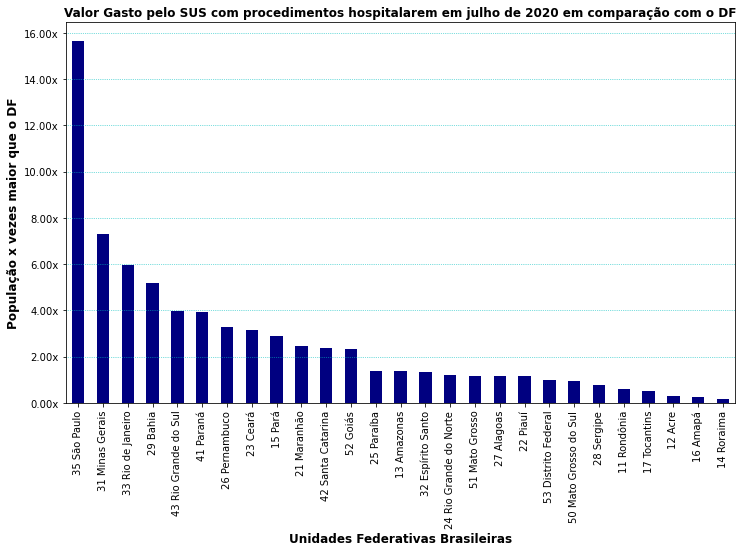

In [88]:

ax = media_pelo_DF.sort_values(ascending=False).plot(kind = "bar",color = "#000080" ,figsize = (12,7))
plt.grid(color='c', linestyle=':', linewidth=.7, axis = 'y')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}x"))
plt.xlabel("Unidades Federativas Brasileiras", fontdict={'fontsize': 12, "fontweight": "bold"})
plt.ylabel("População x vezes maior que o DF", fontdict={'fontsize': 12, "fontweight": "bold"})
plt.title("Valor Gasto pelo SUS com procedimentos hospitalarem em julho de 2020 em comparação com o DF",fontweight= "bold")
plt.show()

#### O que aprendemos:
- Como os dados são represados podem impactar a análise;
- Quais as dificuldades de interpretar e realizar comparações em um gráfico de pizza;
- Como utilizar uma tabela para transmitir informações.

### Monitoria

Começamos a Live de monitoria importando os dados que serão analisados

In [89]:
url = "https://raw.githubusercontent.com/alura-cursos/agendamento-hospitalar/main/dados/A160324189_28_143_208.csv"

dados = pd.read_csv(url, encoding = "ISO-8859-1", engine = "python",
                   skiprows = 3, sep = ";", skipfooter = 12, 
                   thousands = ".", decimal = ",", index_col = 0).drop('Total', axis = 1)
dados.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,-,-,-,-,-,-,-,-,-,-,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57
12 Acre,-,-,-,-,-,-,-,-,-,-,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-
13 Amazonas,-,-,-,-,-,-,-,-,-,-,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
14 Roraima,-,-,-,-,-,-,-,-,-,-,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04
15 Pará,-,-,-,-,-,-,-,-,-,-,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54


Apesar de estarem bem apararente os dados faltantes nesta base de dados, podemos ter dados faltantes no meio dela, o que dificulta a visualização rápida destes dados. Podemos analisar alguns métodos de visualização destes dados faltantes.

In [90]:
dados.isnull().sum().sum()

0

Como a tabela não reconhece os dados faltante como nulos, podemos buscar informações sobre a base de dados para entender o que ele identifica esse "-"

In [91]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 11 Rondônia to 53 Distrito Federal
Columns: 278 entries, 1992/Mar to 2020/Ago
dtypes: float64(156), object(122)
memory usage: 58.9+ KB


Ele identifica as tabelas "-" como objetos, podemos utilizar o replace() para substituir os dados "-" para dados vazios.

In [92]:
dados = dados.replace("-", np.nan)
dados.head()

,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,...,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57
12 Acre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,NaN
13 Amazonas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
14 Roraima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04
15 Pará,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54


In [93]:
dados.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 278 entries, 1992/Mar to 2020/Ago
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   11 Rondônia             158 non-null    object
 1   12 Acre                 158 non-null    object
 2   13 Amazonas             161 non-null    object
 3   14 Roraima              158 non-null    object
 4   15 Pará                 163 non-null    object
 5   16 Amapá                160 non-null    object
 6   17 Tocantins            162 non-null    object
 7   21 Maranhão             166 non-null    object
 8   22 Piauí                161 non-null    object
 9   23 Ceará                164 non-null    object
 10  24 Rio Grande do Norte  163 non-null    object
 11  25 Paraíba              169 non-null    object
 12  26 Pernambuco           172 non-null    object
 13  27 Alagoas              161 non-null    object
 14  28 Sergipe              165 non-null    object
 15 

In [94]:
dados.isnull().sum().sum()

2956

O tipo da coluna está como "object", pois o pandas identificou todas as colunas como strings, por conta dos "-" que continham nos dados, podemos tranformar essa coluna para numérica e plotar um gráfico de um estado para visualizar esses dados.

In [95]:
dados = dados.astype("float64")

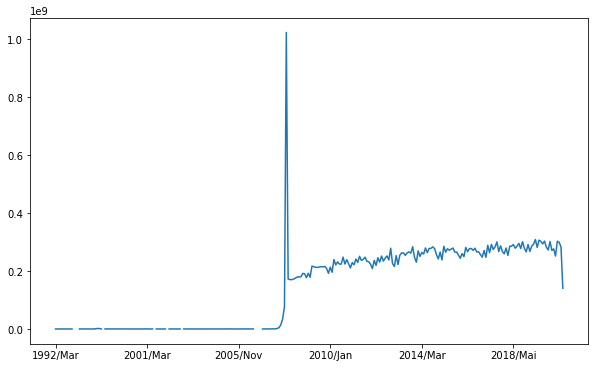

In [96]:
dados.loc['35 São Paulo'].plot(figsize = (10,6))

Vamos limitar os casos deste estado de 2004/Mai a 2007/Jun para criar uma nova tabela e visualizar os dados faltantes que podem conter alguma informação util

In [97]:
dados_sp = dados.loc['35 São Paulo', '2004/Mai' : '2007/Jun']
dados_sp

2004/Mai    19904.67
2004/Jun    54089.02
2004/Jul    52643.02
2004/Ago    78691.89
2004/Set    57860.43
2004/Out    75911.52
2004/Nov    19904.67
2004/Dez    59719.85
2005/Jan   108286.56
2005/Fev    18977.88
2005/Mar      295.75
2005/Abr     8733.40
2005/Mai    11209.33
2005/Jun   241658.52
2005/Jul    26221.20
2005/Ago    12288.96
2005/Set    80635.37
2005/Out    63357.24
2005/Nov     6786.52
2005/Dez   102887.27
2006/Jan   124056.77
2006/Fev   122631.65
2006/Mar    43950.40
2006/Abr    38882.55
2006/Mai    22101.44
2006/Jun   128217.43
2006/Jul    61142.61
2006/Ago         nan
2006/Set    19904.67
2006/Out         nan
2006/Nov         nan
2006/Dez     8695.45
2007/Jan    27961.35
2007/Fev    62859.39
2007/Mar    45586.58
2007/Abr    19967.71
2007/Mai    15514.23
2007/Jun   116836.99
Name: 35 São Paulo, dtype: float64

Temos bastante informação ao redor destes 3 dados nulos faltantes e possívelmente seria melhor analisar outras formas de preencher estes dados, ao inves de "dropar" estes dados

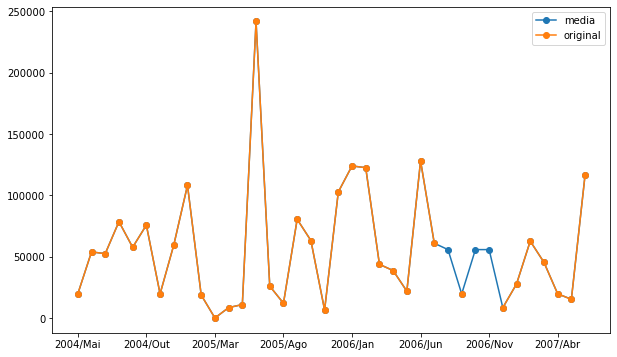

In [101]:
#preencher com o valor da media
dados_sp.fillna(value = dados_sp.mean()).plot(marker = 'o', figsize = (10,6))
dados_sp.plot(marker='o')
plt.legend(["media", "original"])

Será que esta é a melhor forma de preencher estes dados?

Outra forma de preencher este dado é preencher o dado com o dado da frente utilizando o metodo "backfill"

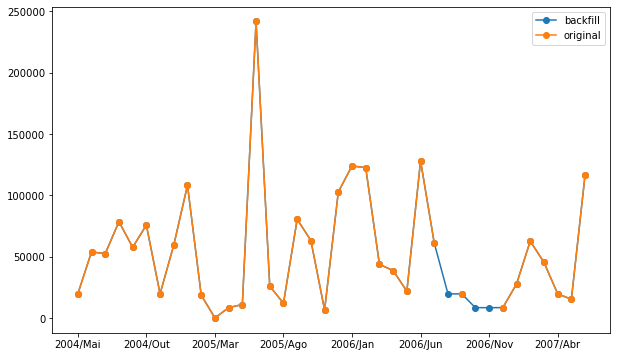

In [106]:
#preencher com o metodo backfill
dados_sp.fillna(method = "backfill").plot(marker = 'o', figsize = (10,6))
dados_sp.plot(marker='o')
plt.legend(["backfill", "original"])

Outro modo que podemos utilizar é a interpolação, onde ele realiza um cálculo para buscar o melhor dado para completar este dado nulo

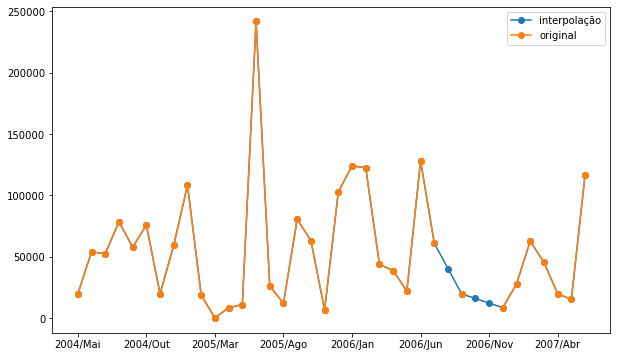

In [107]:
#preencher com o metodo de interpolação
dados_sp.interpolate().plot(marker = 'o', figsize = (10,6))
dados_sp.plot(marker='o')
plt.legend(["interpolação", "original"])

podemos plotar um gráfico de comparação dos métodos e tirar nossas conclusões

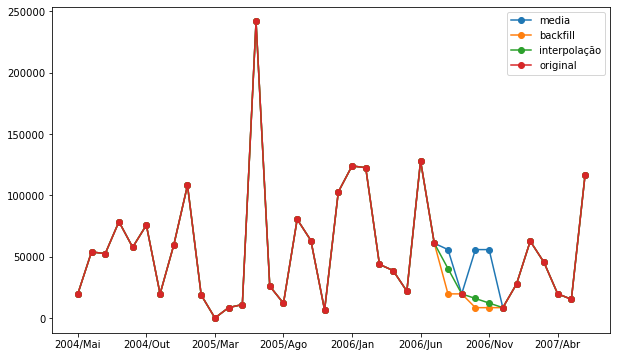

In [108]:
dados_sp.fillna(value = dados_sp.mean()).plot(marker = 'o', figsize = (10,6))
dados_sp.fillna(method = "backfill").plot(marker = 'o', figsize = (10,6))
dados_sp.interpolate().plot(marker = 'o', figsize = (10,6))
dados_sp.plot(marker='o')
plt.legend(["media","backfill","interpolação", "original"])

Podemos perceber que a interpolação é a que mais se adequou ao gráfico, deixando-o mais suave. Quando estamos preenchendo dados nulos, não buscamos criar uma mudança brusca no gráfico, logo preenche-los com os dados que deixem nosso gráfico "mais suave" será sempre uma boa opção, no caso destes dados, a melhor escolha seria a interpolação